# Exploratory Data Analysis: Data Science Salaries

## Introduction

For this analysis, we are looking at different salaries of various employees in the field of Data Science. This dataset is already cleaned and ready for analysis, so we will focus mostly on EDA. 

There are many features in the dataset, like experience level, title, and employment type, as well as details about the company they work for, like country of company and remote ratio.

### Audience

Lets assume that our stakeholder for this analysis is an HR colleague who is trying to understand what factors impact salaries for Data Science roles. 

### Potential Business Questions

1. How do salaries vary by job title (e.g., data scientist, ML engineer, data analyst)?
2. What is the distribution of salaries across different experience levels?
3. How have data science salaries changed over time?
4. What is the correlation between remote ratio and salary?
5. How do salaries differ by location (e.g., employee country, company country)?

### Step 1: Load, clean/prepare the Data for Analysis

In [1]:
import numpy as np
import pandas as pd
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

data_filepath = "../input/data-science-salaries-2023/ds_salaries.csv"

salary_data = pd.read_csv(data_filepath)

salary_data.head()

Setup Complete


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
#Check for missing values

salary_data.isnull().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Before getting into the analysis, there are some **categorization** that we need to help us analyze the data. The experience level that was provided in the dataset should be expanded, for ease of interpretation. The job titles should also be categorized into the top / well-known titles, we don't really care about the exact title (i.e. "Principal Data Scientist", since the level will be taken from the experience category (i.e. Senior).

In [3]:
# Define the order of experience levels
def categorize_experience(exp):
    exp = exp.lower() if pd.notna(exp) else ""
    if "en" in exp:
        return "Entry-Level"
    elif "mi" in exp:
        return "Mid-Level"
    elif "se" in exp:
        return "Senior"
    elif "ex" in exp:
        return "Executive"
    else:
        return "Other"

salary_data['experience_category'] = salary_data['experience_level'].apply(categorize_experience)

experience_order = ["Entry-Level", "Mid-Level", "Senior", "Executive"]

salary_data['experience_category'] = pd.Categorical(salary_data['experience_category'], categories=experience_order, ordered=True)

# Group job titles into most common categories

def categorize_job(title):
    title = title.lower() if pd.notna(title) else ""
    if "data scientist" in title:
        return "Data Scientist"
    elif "data engineer" in title:
        return "Data Engineer"
    elif "data analyst" in title:
        return "Data Analyst"
    elif "AI Engineer" or "ML Engineer" in title:
        return "AI/ML Engineer"
    else:
        return "Other"

salary_data['job_category'] = salary_data['job_title'].apply(categorize_job)

### Step 2: Visualize the data and answer our business questions



**Question 1:** How do salaries vary by job title (e.g., data scientist, ML engineer, data analyst)?

**Question 2:** What is the distribution of salaries across different experience levels?

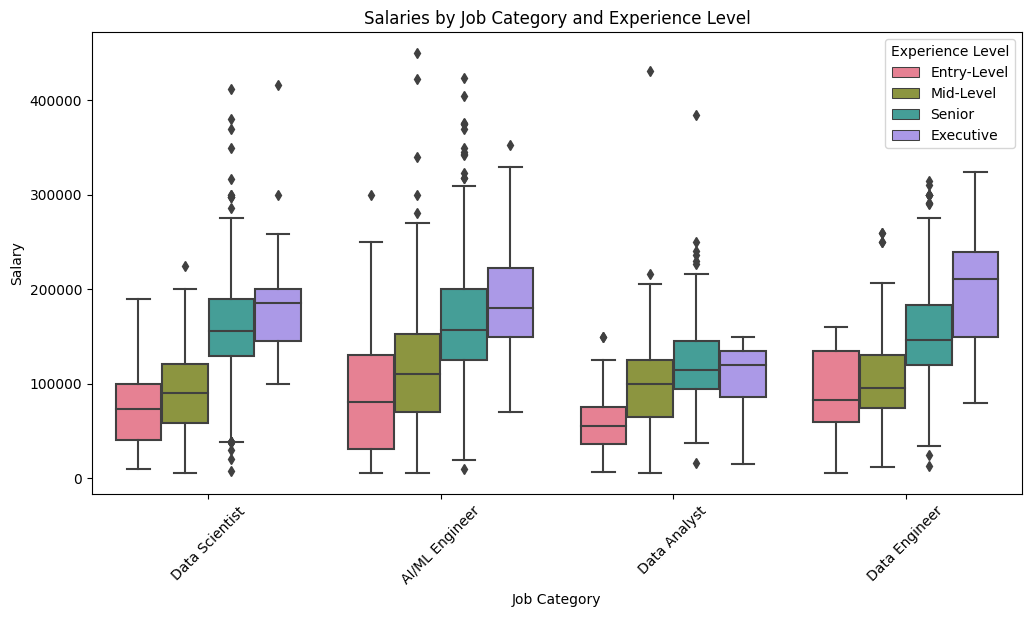

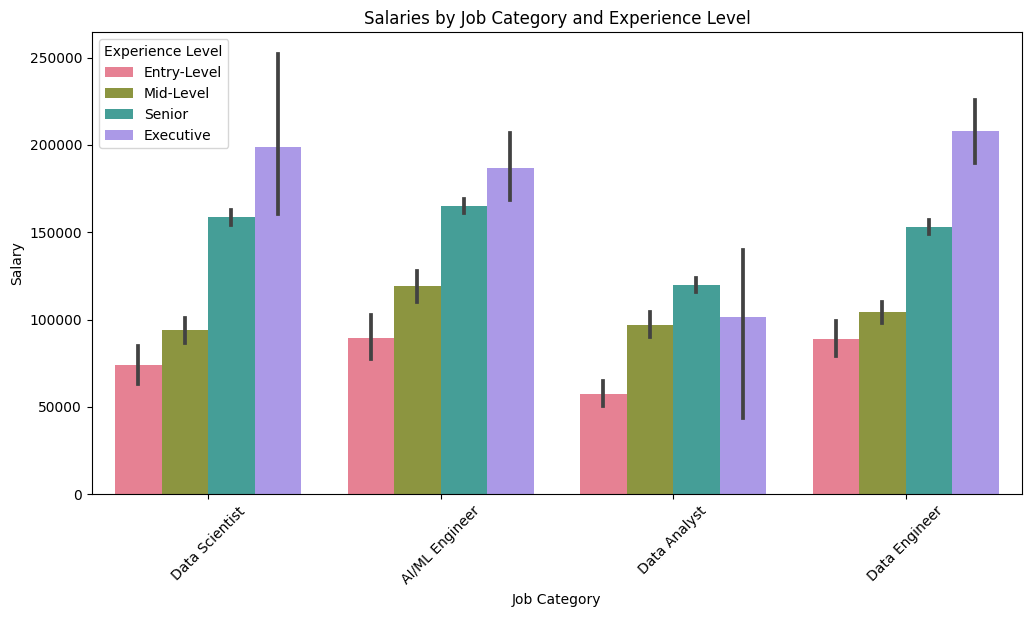

In [4]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=salary_data, x='job_category', y='salary_in_usd', hue='experience_category', palette="husl")

plt.xticks(rotation=45)
plt.title("Salaries by Job Category and Experience Level")
plt.xlabel("Job Category")
plt.ylabel("Salary")
plt.legend(title="Experience Level")
plt.show()

plt.figure(figsize=(12, 6))

sns.barplot(data=salary_data, x='job_category', y='salary_in_usd', hue='experience_category', palette="husl")

plt.xticks(rotation=45)
plt.title("Salaries by Job Category and Experience Level")
plt.xlabel("Job Category")
plt.ylabel("Salary")
plt.legend(title="Experience Level")
plt.show()

**Question 3:** How have data science salaries changed over time?

We expect salaries to increase over time, and we are able to confirm this is the case as we look at average salary by year.

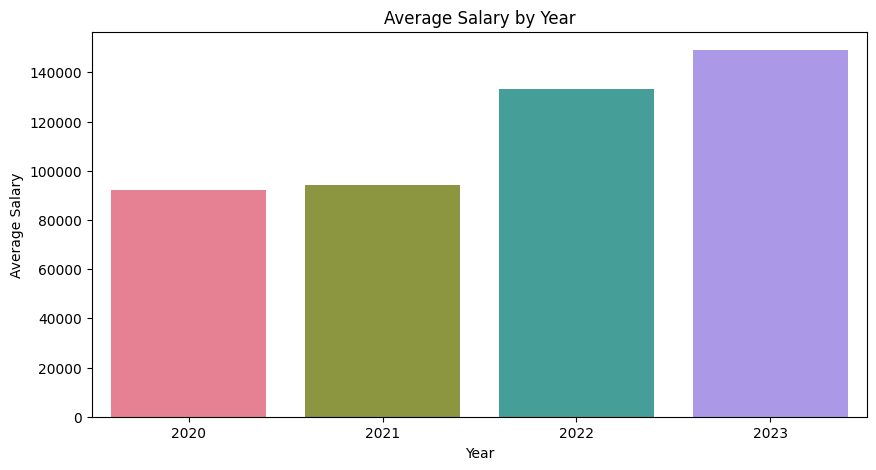

In [5]:
df_grouped = salary_data.groupby('work_year')['salary_in_usd'].mean().reset_index()  

plt.figure(figsize=(10, 5))
sns.barplot(data=df_grouped, x='work_year', y='salary_in_usd', palette='husl')
plt.title("Average Salary by Year")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.show()

**Question 4:** What is the correlation between remote ratio and salary?

Looking at the voilin plot below, you will notice very little difference in the distribution of salaries of the fully remote and fully onsite workers, however, there is a clear difference between these groups and the 50% remote workers, who tend to be pay lower salaries on average. 

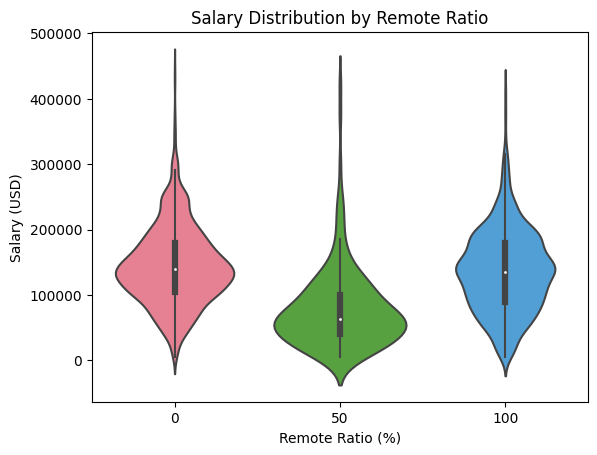

In [6]:
sns.violinplot(data=salary_data, x='remote_ratio', y='salary_in_usd', palette="husl" )
plt.title("Salary Distribution by Remote Ratio")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.show()


**Question 5:** How do salaries differ by location (e.g., employee country, company country)?